<a href="https://colab.research.google.com/github/sapanapawar/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Sapana_Pawar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Loading the Required Libraries and Modules

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

The first step is to explore the dataset and understand the data.

#Mount drive & load the dataset

In [2]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Working directory path
file_path = '/content/drive/MyDrive/pd csv file/SeoulBikeData.csv'

In [4]:
#Reading the dataset
dataset = pd.read_csv(file_path, encoding= 'unicode_escape')

#Exploration

In [5]:
#Let's how the dataset look like
dataset

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
#Renaming the columns
dataset.columns=['Date','Rent_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'DPT',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning_Day']

In [7]:
#Observing first five rows
dataset.head()

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
#Observing last five rows
dataset.tail()

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
#Checking for number of rows and columns
dataset.shape

(8760, 14)

There are total 8760 columns and 14 rows in the dataset.

In [10]:
#Let's see the descriptive summary 
dataset.describe(include='all')

,Date,Rent_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,DPT,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,30/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


The describe() function provides a statistical summary of all the quantitative variables.



In [11]:
#Basic information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             8760 non-null   object 
 1   Rent_Bike_Count  8760 non-null   int64  
 2   Hour             8760 non-null   int64  
 3   Temperature      8760 non-null   float64
 4   Humidity         8760 non-null   int64  
 5   Wind_speed       8760 non-null   float64
 6   Visibility       8760 non-null   int64  
 7   DPT              8760 non-null   float64
 8   Solar_Radiation  8760 non-null   float64
 9   Rainfall         8760 non-null   float64
 10  Snowfall         8760 non-null   float64
 11  Seasons          8760 non-null   object 
 12  Holiday          8760 non-null   object 
 13  Functioning_Day  8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [12]:
#Looking for duplicates
dataset.duplicated().sum()

0

There are no duplicates present in the dataset.

#Let's see some visualization before doing data cleaning

Text(0, 0.5, 'Rent_Bike_Count')

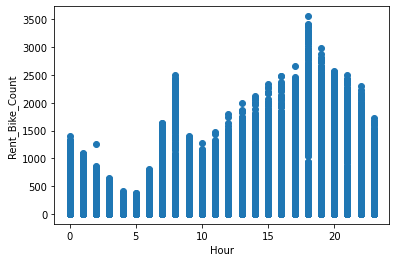

In [13]:
#Plotting the scatter plot of hour vs rented bike count
plt.scatter(x=dataset['Hour'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Hour')
plt.ylabel('Rent_Bike_Count')

From the above Scatter Chart, we can observe that
data points are closely placed to each other, thereby forming
dark linear patterns on the graph.

Text(0, 0.5, 'Rent_Bike_Count')

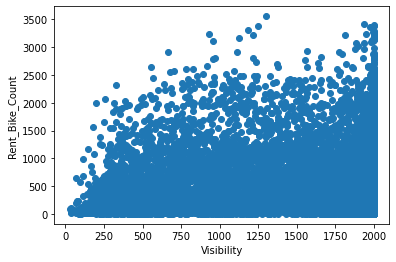

In [14]:
#Plotting the scatter plot of visibility vs rented bike count
plt.scatter(x=dataset['Visibility'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Visibility')
plt.ylabel('Rent_Bike_Count')

Text(0, 0.5, 'Rent_Bike_Count')

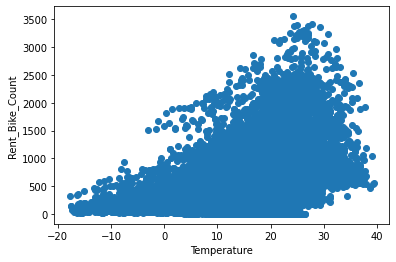

In [15]:
#Plotting the scatter plot of temperature vs rented bike count
plt.scatter(x=dataset['Temperature'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Temperature')
plt.ylabel('Rent_Bike_Count')

From the above distribution, Rental Bike Count is
spread in form of a cloud which is dense around the region
of -20 to 40C. The small tailing clusters towards the higher
end of Y axis shows that almost all the data points will
affect our regression model.


Text(0, 0.5, 'Rent_Bike_Count')

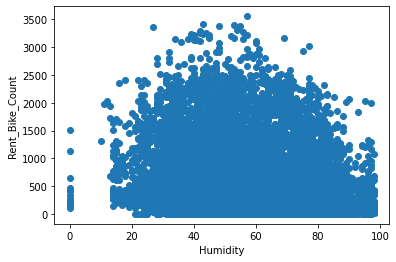

In [16]:
#Plotting the scatter plot of humidity vs rented bike count
plt.scatter(x=dataset['Humidity'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Humidity')
plt.ylabel('Rent_Bike_Count')

From the above Scatter Plot, it is evident that data
points form a cloud for Humidity ranging between 20 to
100. 

Text(0, 0.5, 'Rent_Bike_Count')

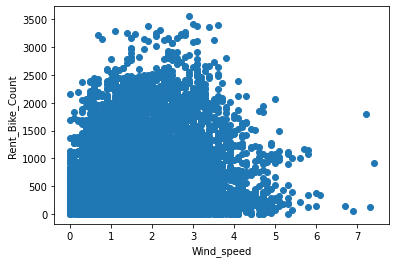

In [17]:
#Plotting the scatter plot of wind speed vs rented bike count
plt.scatter(x=dataset['Wind_speed'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Wind_speed')
plt.ylabel('Rent_Bike_Count')

The data
points form a prominent cloud around the Wind Speed lying
between 0-5 m/s.

Text(0, 0.5, 'Rent_Bike_Count')

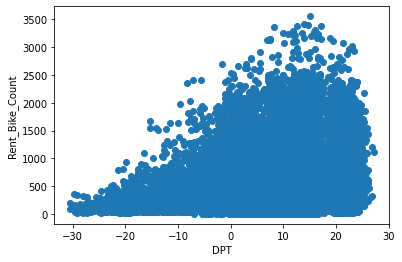

In [18]:
#Plotting the scatter plot of DPT vs rented bike count
plt.scatter(x=dataset['DPT'], y=dataset['Rent_Bike_Count'])
plt.xlabel('DPT')
plt.ylabel('Rent_Bike_Count')

From the above Scatter Plot, the formed data point cloud
depicts that Dew Point Temperatures did not make any
significant impact until Rental Bike Count reached 500.

Text(0, 0.5, 'Rent_Bike_Count')

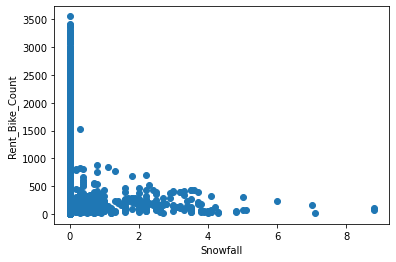

In [19]:
#Plotting the scatter plot of snowfall vs rented bike count
plt.scatter(x=dataset['Snowfall'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Snowfall')
plt.ylabel('Rent_Bike_Count')

The Scatter Plot above suggest, 0 cm Snowfall
dominated the Rental Count distribution and clusters lying till
4 cm. 

Text(0, 0.5, 'Rent_Bike_Count')

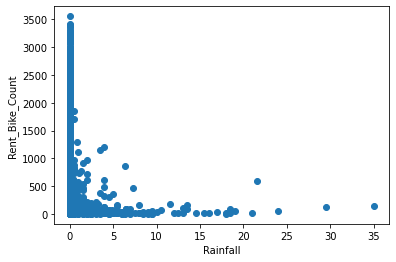

In [20]:
#Plotting the scatter plot of rainfall vs rented bike count
plt.scatter(x=dataset['Rainfall'], y=dataset['Rent_Bike_Count'])
plt.xlabel('Rainfall')
plt.ylabel('Rent_Bike_Count')

The Scatter Plot above suggests that a significant
number of counts lies along the dates when Rainfall was equal
to 0 mm.